### Importing the Dataset

In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('amazon_alexa.csv')

In [93]:
df.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [94]:
df.shape

(3150, 2)

#### checking for null and Duplicates

In [95]:
df.isnull().sum()

reviews      0
sentiment    0
dtype: int64

In [96]:
df.duplicated().sum()

848

#### Deleting the duplicate rows

In [97]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [98]:
df.shape

(2302, 2)

#### Preprocessing the data


In [99]:
import nltk
import re

In [100]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [101]:
sw = stopwords.words('English')
#print(sw)
lm = WordNetLemmatizer()

#### Applying Text Preprocessing Steps on the entire Dataset

In [102]:
reviews = []
for i in df['reviews']:
    t = i.lower()                      # Lowercase conversion
    t = re.sub('[^A-Za-z0-9]',' ',t)   #punctuation removal
    t = word_tokenize(t)               #word_tokenize
    t = [i for i in t if i not in sw]  # Removing stopwords
    t = [lm.lemmatize(i) for i in t]   #Lemmatization
    t = ' '.join(t)                    #list of sentences after all preprocessing
    reviews.append(t)
print(len(reviews))
#print(reviews)

2302


#### Applying Transformation -> Count Vectorization

In [103]:
from sklearn.feature_extraction.text import CountVectorizer 

In [104]:
x = reviews
y = df['sentiment']
print(type(x))
print(type(y))
print(len(x))
print(y.shape)

<class 'list'>
<class 'pandas.core.series.Series'>
2302
(2302,)


In [105]:
cv = CountVectorizer()
cv.fit(x)

sm1 = cv.transform(x).toarray()
print(len(cv.get_feature_names_out()))
#print(cv.get_feature_names_out())
#print(sm1)

3548


In [106]:
df.shape

(2302, 2)

In [107]:
print(len(sm1))
print(len(y))

2302
2302


#### Splitting the dataset into train and test data

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [109]:
x_train,x_test,y_train,y_test = train_test_split(sm1,y,test_size=0.3,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1611, 3548)
(691, 3548)
(1611,)
(691,)


In [110]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [111]:
def eval_model(ytest ,ypred):
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    
def mscore(model):
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))

#### Naive Bayes Classification

In [112]:
m1 = MultinomialNB()
m1.fit(x_train,y_train)

MultinomialNB()

In [113]:
print('Train Score',m1.score(x_train,y_train))
print('Test Score',m1.score(x_test,y_test))

Train Score 0.9540657976412167
Test Score 0.9276410998552822


In [114]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [115]:
mnb_acc = accuracy_score(y_test,ypred_m1)
print('Accuarcy Score',mnb_acc)  # equals to test score

Accuarcy Score 0.9276410998552822


#### Creating function to calculate confusion matrix, classification report and evaluate the accuracy of model

In [116]:
mscore(m1)

Train Score 0.9540657976412167
Test Score 0.9276410998552822


In [117]:
eval_model(y_test,ypred_m1)

[[ 18  42]
 [  8 623]]
              precision    recall  f1-score   support

           0       0.69      0.30      0.42        60
           1       0.94      0.99      0.96       631

    accuracy                           0.93       691
   macro avg       0.81      0.64      0.69       691
weighted avg       0.92      0.93      0.91       691



#### Linear Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
m2 = LogisticRegression(max_iter=10000)
m2.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [120]:
mscore(m2)

Train Score 0.9770328988206083
Test Score 0.9247467438494935


In [121]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

In [122]:
eval_model(y_test,ypred_m2)

[[ 16  44]
 [  8 623]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        60
           1       0.93      0.99      0.96       631

    accuracy                           0.92       691
   macro avg       0.80      0.63      0.67       691
weighted avg       0.91      0.92      0.91       691



In [123]:
lr_acc = accuracy_score(y_test,ypred_m2)
print('Accuarcy Score',lr_acc)  # equals to test score

Accuarcy Score 0.9247467438494935


#### KNN classification

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
m3 = KNeighborsClassifier(n_neighbors=15)  
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [126]:
mscore(m3)

Train Score 0.9087523277467412
Test Score 0.9131693198263386


In [127]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [128]:
eval_model(y_test,ypred_m3)

[[  0  60]
 [  0 631]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.91      1.00      0.95       631

    accuracy                           0.91       691
   macro avg       0.46      0.50      0.48       691
weighted avg       0.83      0.91      0.87       691



C:\Users\BRIJ BRIJKISHOR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BRIJ BRIJKISHOR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BRIJ BRIJKISHOR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
knn_acc = accuracy_score(y_test,ypred_m3)
print('Accuarcy Score',knn_acc)  # equals to test score

Accuarcy Score 0.9131693198263386


In [130]:
accuracies = [mnb_acc,lr_acc,knn_acc]
model_names = ['naive_bayes classification','Logistic Regression', 'KNN' ]
# index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# name of the best model
best_model_name = model_names[best_model_index]
print("The best model is", best_model_name, "with an accuracy of", accuracies[best_model_index])

The best model is naive_bayes classification with an accuracy of 0.9276410998552822


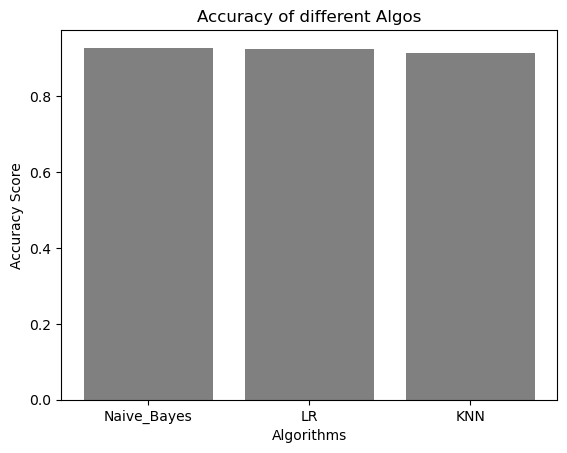

In [131]:
plt.bar(x=['Naive_Bayes','LR','KNN'],height= [mnb_acc,lr_acc,knn_acc,],color='grey')
plt.title('Accuracy of different Algos')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()                      #predicting the sentiments